<a href="https://colab.research.google.com/github/rsautter/Eta/blob/main/notebooks/EtaTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [2]:
!pip install ordpy wurlitzer Pillow

In [3]:
#!pip install git+https://github.com/rsautter/gpa/
!pip install git+https://github.com/barauna-lo/GPA.git

  Cloning https://github.com/barauna-lo/GPA.git to /tmp/pip-req-build-wer7lugn
  Running command git clone --filter=blob:none --quiet https://github.com/barauna-lo/GPA.git /tmp/pip-req-build-wer7lugn
  Resolved https://github.com/barauna-lo/GPA.git to commit 2c011bb317699305375b9847baf7a6f4509c0b4c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for GPA: filename=GPA-3.5-cp310-cp310-linux_x86_64.whl size=1514488 sha256=d5481da941c4a9c1022593035c399158844aa7a5091ca9b12b443c86c3419d84
  Stored in directory: /tmp/pip-ephem-wheel-cache-9tiaemh3/wheels/4f/03/b6/742740ea73d4aa456120dd559208a4f8dc874802578ef46d55
Successfully built GPA


In [4]:
# !pip install wurlitzer
!git clone https://github.com/rsautter/pyJHTDB
!pip install --log log.txt pyJHTDB/.

Cloning into 'pyJHTDB'...
remote: Enumerating objects: 1459, done.
remote: Counting objects: 100% (164/164), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 1459 (delta 85), reused 125 (delta 69), pack-reused 1295
Receiving objects: 100% (1459/1459), 7.45 MiB | 16.16 MiB/s, done.
Resolving deltas: 100% (870/870), done.
Processing ./pyJHTDB
  Preparing metadata (setup.py) ... done
  Created wheel for pyJHTDB: filename=pyJHTDB-20210108.0-cp310-cp310-linux_x86_64.whl size=1108420 sha256=aabbbd130d1d3ebb4de380d88aa8491b56bb43ec83b3359598b84621e2844350
  Stored in directory: /tmp/pip-ephem-wheel-cache-1gog0tc9/wheels/f2/4a/52/39095551bf3f3e0499a222133018c7d4e11173593eb3c88d1f
Successfully built pyJHTDB


In [5]:
!pip install --force-reinstal git+https://github.com/rsautter/eta/

  Cloning https://github.com/rsautter/eta/ to /tmp/pip-req-build-wncmdycq
  Running command git clone --filter=blob:none --quiet https://github.com/rsautter/eta/ /tmp/pip-req-build-wncmdycq
  Resolved https://github.com/rsautter/eta/ to commit f1e65358fab52a79e903ae1cc3b6c34d118f76b4
  Preparing metadata (setup.py) ... done
  Created wheel for Eta: filename=Eta-0.1-py3-none-any.whl size=15117 sha256=2de17954c8c184de24d2de1bd1ff4d31bdab8b98d03a79f8f31dd21e2a732b6e
  Stored in directory: /tmp/pip-ephem-wheel-cache-d_6c61qv/wheels/be/e5/6a/f34013f615a3379f8419799e352c823927e6d8decfebf50307
Successfully built Eta


In [6]:
!pip install --force-reinstall git+https://github.com/rsautter/Noisy-Complex-Ginzburg-Landau

  Cloning https://github.com/rsautter/Noisy-Complex-Ginzburg-Landau to /tmp/pip-req-build-be8thj9y
  Running command git clone --filter=blob:none --quiet https://github.com/rsautter/Noisy-Complex-Ginzburg-Landau /tmp/pip-req-build-be8thj9y
  Resolved https://github.com/rsautter/Noisy-Complex-Ginzburg-Landau to commit 98d6a3a85e19e5c0e80d41e297dec6afd4a18d69
  Preparing metadata (setup.py) ... done
  Created wheel for NCGL: filename=NCGL-0.1-py3-none-any.whl size=18850 sha256=ccc8f71e345df379bcff0f68fe101e9683cf3f59f1be11b1b628c92c3f3f8a38
  Stored in directory: /tmp/pip-ephem-wheel-cache-l9h0c4jz/wheels/bc/92/12/b3ad30c00cc629588178c0455936a8ec81bc775213bae2bb70
Successfully built NCGL


In [7]:
# !pip install Pillow

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from mpl_toolkits.axes_grid1 import inset_locator
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

import cv2
import NCGL
import eta
import tqdm
import pyJHTDB
from pyJHTDB.dbinfo import mhd1024, isotropic1024coarse
from pyJHTDB import libJHTDB
from ordpy import *
from GPA import GPA
import glob
from PIL import Image



# Functions

In [9]:
def readMod(i):
  dx = pd.read_csv(f'ux_{i}.dat', header=None, delimiter='\s+',  on_bad_lines='skip').to_numpy()
  dy = pd.read_csv(f'uy_{i}.dat', header=None, delimiter='\s+',  on_bad_lines='skip').to_numpy()
  dz = pd.read_csv(f'uz_{i}.dat', header=None, delimiter='\s+',  on_bad_lines='skip').to_numpy()
  return np.sqrt(dx**2+dy**2+dz**2)

def getJHTDBIso(timeIndex,size=64):
  lJHTDB = libJHTDB()
  lJHTDB.initialize()
  auth_token  = "edu.jhu.pha.turbulence.testing-201311"  #Replace with your own token here
  lJHTDB.add_token(auth_token)
  t = np.linspace(0, 10, size)
  x = np.zeros((size, size, 3), np.float32)
  x[:, :, 0] = np.linspace(0, 1, size)[np.newaxis, :]
  x[:, :, 1] = np.linspace(0, 1, size)[:, np.newaxis]
  x[:, :, 2] = 0.5
  data = lJHTDB.getData(t[timeIndex],x,sinterp = 4, getFunction='getVelocity')
  lJHTDB.finalize()
  return np.sqrt(data[:,:,0]**2+data[:,:,1]**2+data[:,:,2]**2)

# Data

## Pencil

In [10]:
!gdown 1X5aOr5kQm6NpdSLiTVWt-Fwm-ttwQfTL

Downloading...
From: https://drive.google.com/uc?id=1X5aOr5kQm6NpdSLiTVWt-Fwm-ttwQfTL
To: /content/simulaturb_Erico_Rempel_ITA.zip
100% 1.69M/1.69M [00:00<00:00, 99.0MB/s]


In [11]:
!unzip  simulaturb_Erico_Rempel_ITA.zip

Archive:  simulaturb_Erico_Rempel_ITA.zip
  inflating: ux_1.dat                
  inflating: ux_2.dat                
  inflating: ux_3.dat                
  inflating: ux_4.dat                
  inflating: ux_5.dat                
  inflating: ux_6.dat                
  inflating: ux_7.dat                
  inflating: ux_8.dat                
  inflating: ux_9.dat                
  inflating: ux_10.dat               
  inflating: ux_11.dat               
  inflating: ux_12.dat               
  inflating: ux_13.dat               
  inflating: ux_14.dat               
  inflating: ux_15.dat               
  inflating: ux_16.dat               
  inflating: ux_17.dat               
  inflating: ux_18.dat               
  inflating: ux_19.dat               
  inflating: ux_20.dat               
  inflating: ux_21.dat               
  inflating: ux_22.dat               
  inflating: ux_23.dat               
  inflating: ux_24.dat               
  inflating: ux_25.dat               
  inflat

## CGL 3D

In [12]:
!gdown 1cRD0YnSjWPjFxj7OtDTR_ahlYvdqt20k

Downloading...
From: https://drive.google.com/uc?id=1cRD0YnSjWPjFxj7OtDTR_ahlYvdqt20k
To: /content/data.zip
100% 22.9M/22.9M [00:00<00:00, 55.6MB/s]


In [13]:
!unzip data.zip

Archive:  data.zip
   creating: data/
  inflating: data/s27.txt            
  inflating: data/s0.txt             
  inflating: data/s1.txt             
  inflating: data/s2.txt             
  inflating: data/s3.txt             
  inflating: data/s4.txt             
  inflating: data/s5.txt             
  inflating: data/s6.txt             
  inflating: data/s7.txt             
  inflating: data/s8.txt             
  inflating: data/s9.txt             
  inflating: data/s10.txt            
  inflating: data/s11.txt            
  inflating: data/s12.txt            
  inflating: data/s13.txt            
  inflating: data/s14.txt            
  inflating: data/s15.txt            
  inflating: data/s16.txt            
  inflating: data/s17.txt            
  inflating: data/s18.txt            
  inflating: data/s19.txt            
  inflating: data/s20.txt            
  inflating: data/s21.txt            
  inflating: data/s22.txt            
  inflating: data/s23.txt            
  inflating:

In [14]:
snap = []
for i in range(500):
  snap.append(pd.read_csv(f'data/s{i}.txt', header=None, delimiter='\s+').to_numpy())

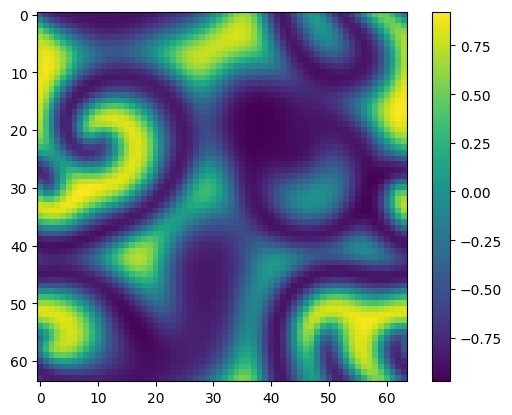

In [15]:
plt.figure()
plt.imshow(snap[-490])
plt.colorbar()
plt.show()

-1.756581344310079


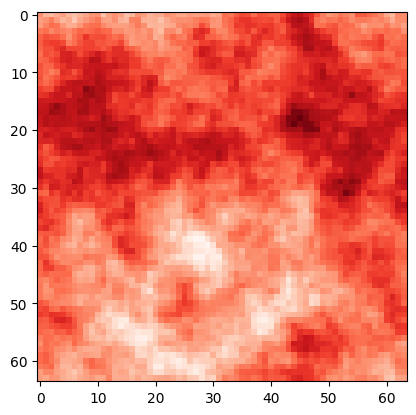

In [16]:
m = NCGL.cNoise(2,[64,64,64])
print(eta.entropy(m)["Spectral_PowerlawTsallis"])
plt.figure()
image2 = m[1]
plt.imshow(image2,cmap='Reds')

#plt.colorbar()
plt.show()

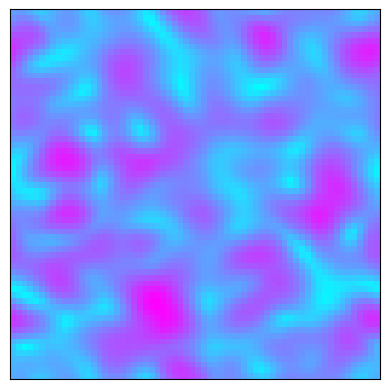

In [17]:
plt.figure()
plt.imshow(readMod(5),cmap='cool')

plt.xticks([])
plt.yticks([])
plt.show()

## Turbulence

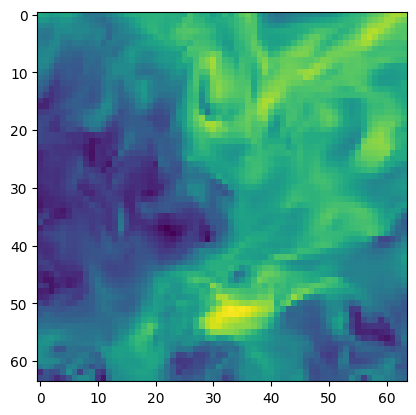

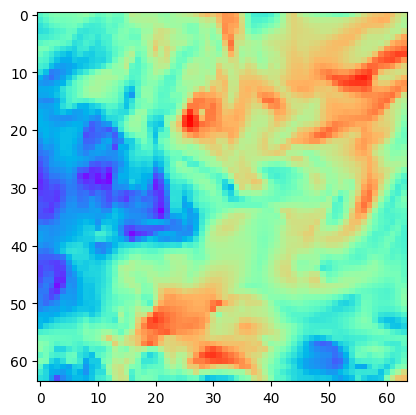

In [18]:
data = getJHTDBIso(24)
plt.figure()
plt.imshow(data)
data = getJHTDBIso(25)
plt.figure()
plt.imshow(data,cmap='rainbow')
plt.show()

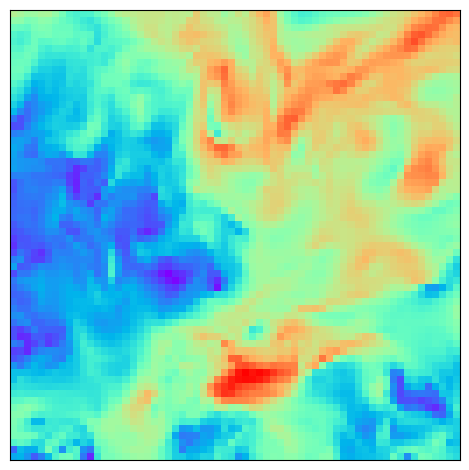

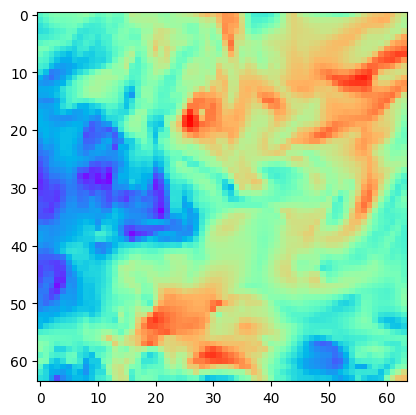

In [19]:
data = getJHTDBIso(24)
plt.figure()
plt.imshow(data,cmap='rainbow')
plt.xticks([])
plt.yticks([])
plt.tight_layout()
data = getJHTDBIso(25)
plt.figure()
plt.imshow(data,cmap='rainbow')
plt.show()

## Plot all systems

In [20]:
!gdown 1QIOdqzrG0sFKa2ZDzNHyihCXjLtMCubD

Downloading...
From: https://drive.google.com/uc?id=1QIOdqzrG0sFKa2ZDzNHyihCXjLtMCubD
To: /content/snapEvol.zip
100% 230k/230k [00:00<00:00, 72.2MB/s]


In [21]:
!unzip snapEvol.zip

Archive:  snapEvol.zip
   creating: snapEvol/
  inflating: snapEvol/s0.csv         
  inflating: snapEvol/s1.csv         
  inflating: snapEvol/s2.csv         
  inflating: snapEvol/s3.csv         
  inflating: snapEvol/s4.csv         


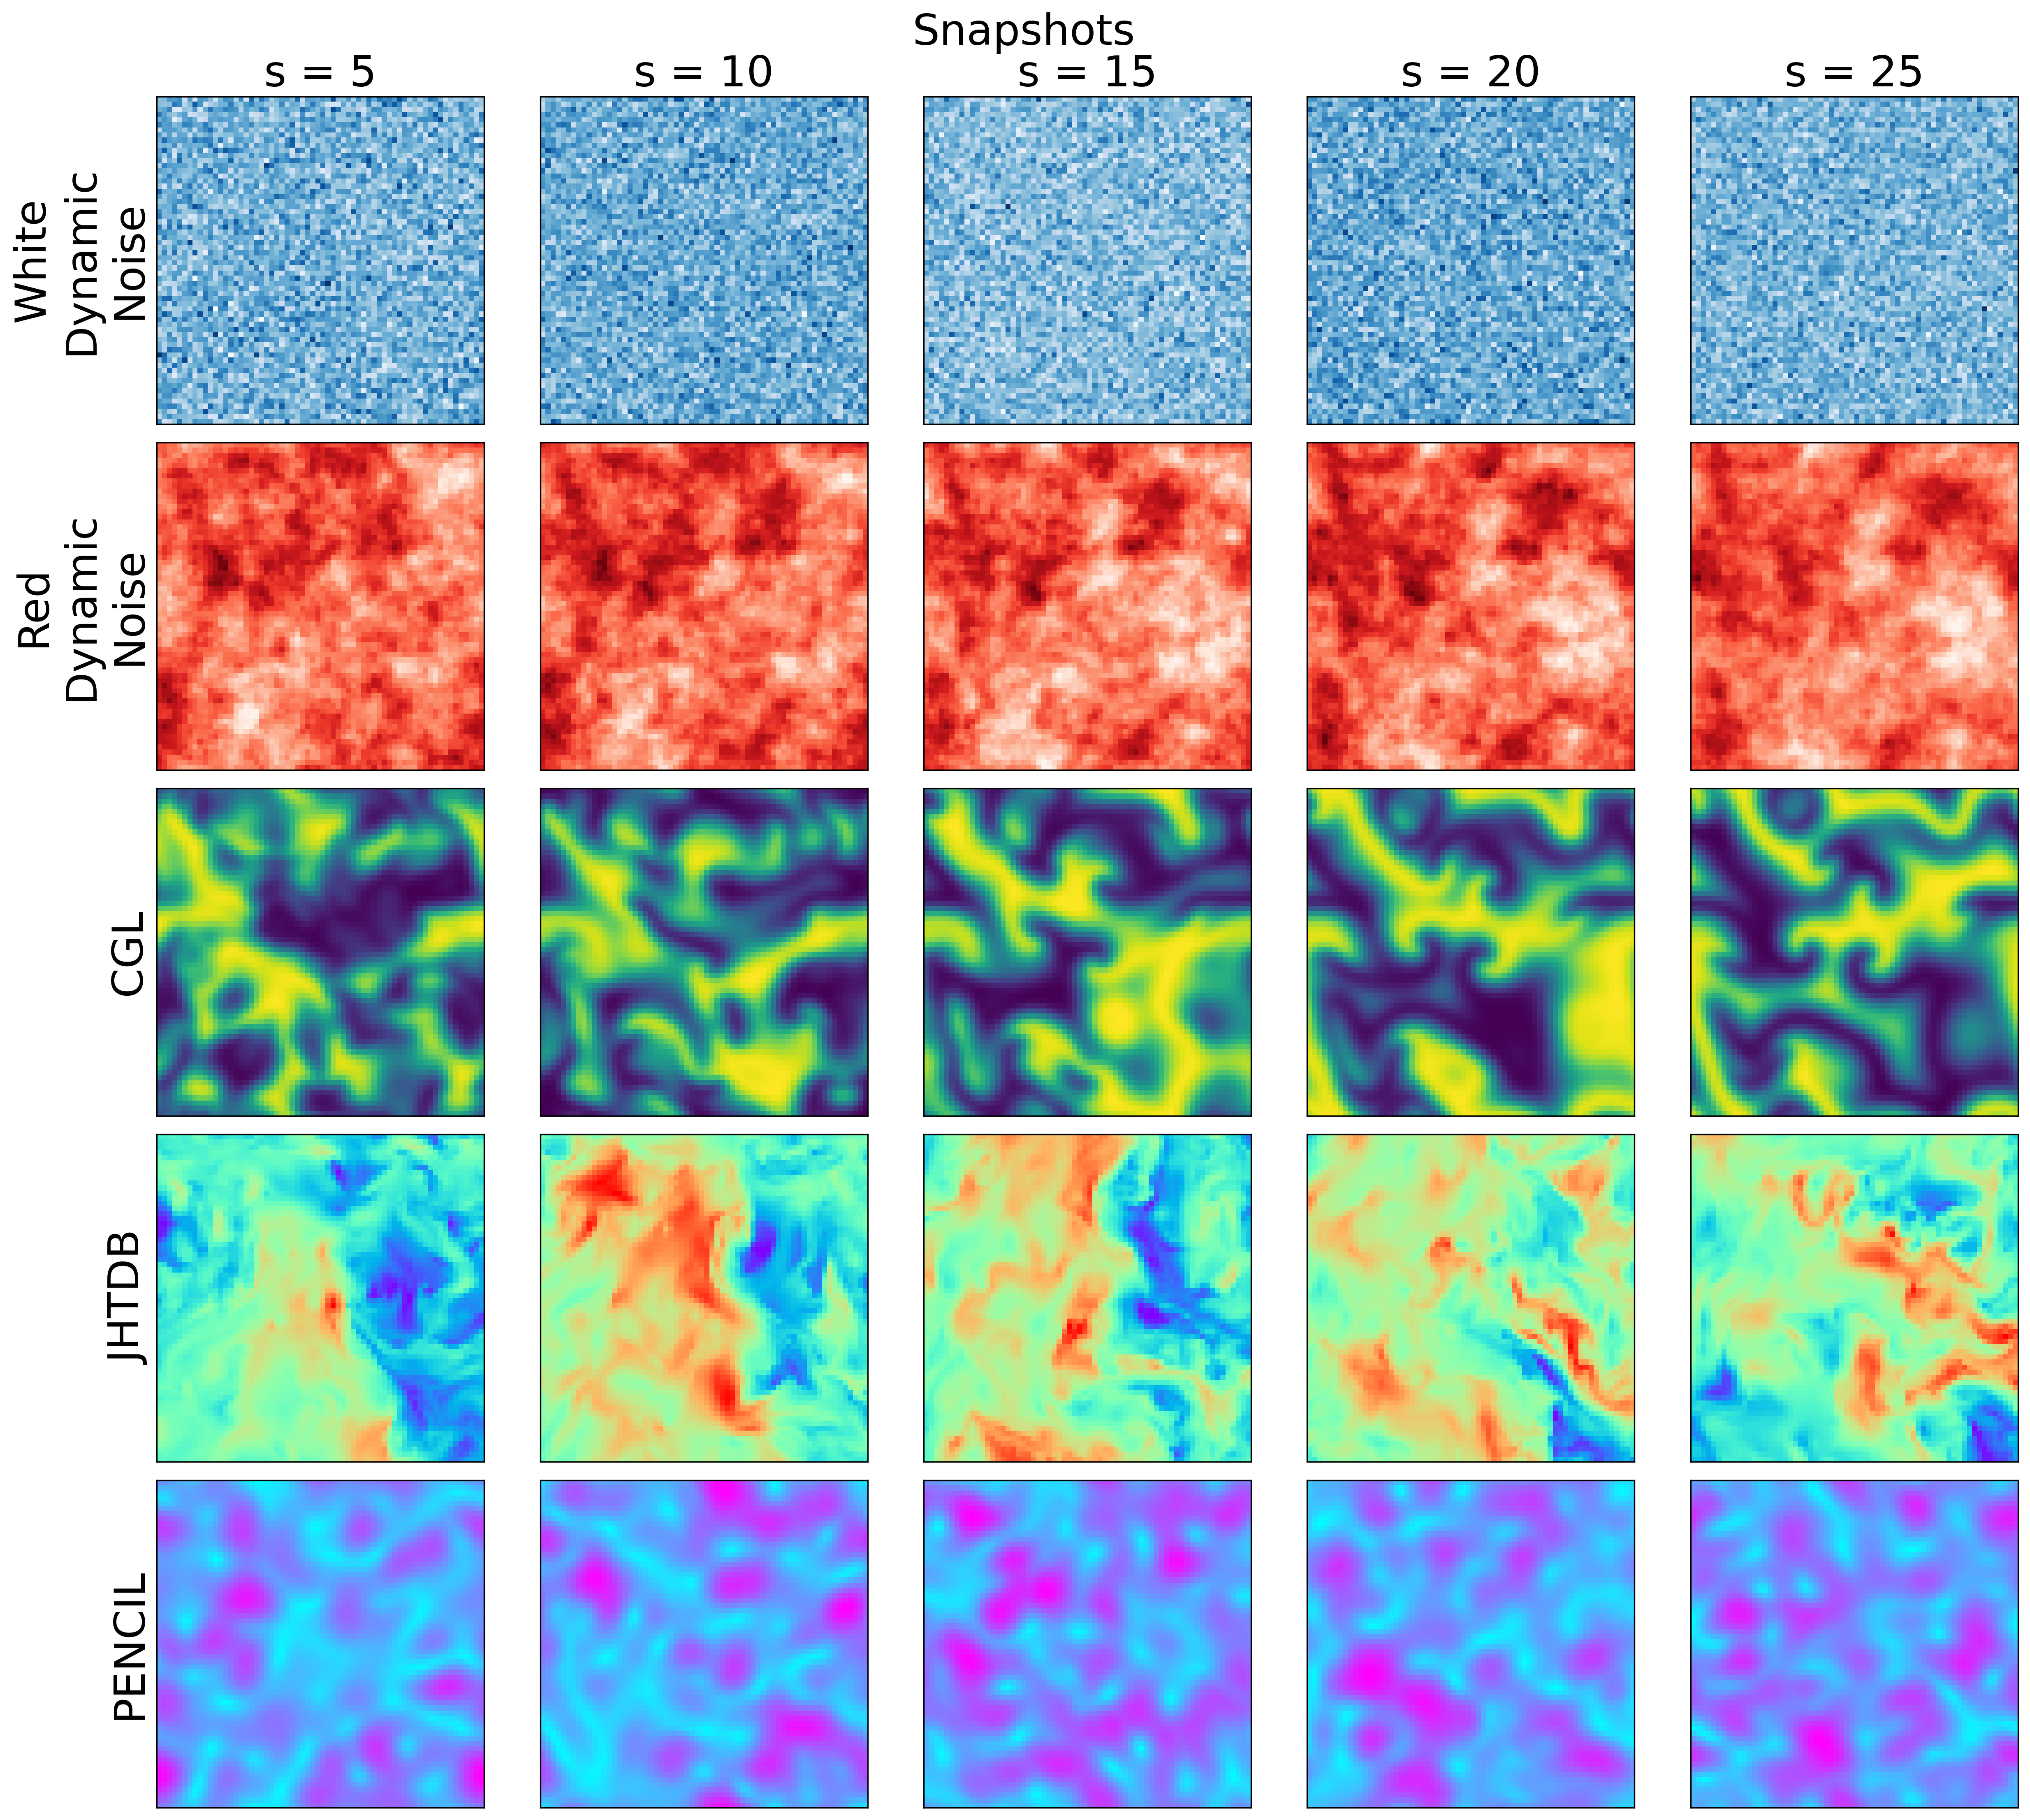

In [22]:
from matplotlib.gridspec import GridSpec

seq = [5,10,15,20,25]
gs = GridSpec(5,5)
wdn = NCGL.cNoise(0,[25,64,64])
rdn = NCGL.cNoise(2,[25,64,64])

plt.figure(figsize=(17,15),dpi=300)
plt.suptitle("Snapshots",fontsize=25)
for i in range(0,len(seq)):
  plt.subplot(gs[0,i])
  plt.imshow(wdn[i],cmap='Blues')
  plt.xticks([])
  plt.yticks([])
  if i == 0: plt.ylabel('White\nDynamic\nNoise',fontsize=25)
  plt.title(f's = {seq[i]}',fontsize=25)

  plt.subplot(gs[1,i])
  plt.imshow(rdn[i],cmap='Reds')
  plt.xticks([])
  plt.yticks([])
  if i == 0: plt.ylabel('Red\nDynamic\nNoise',fontsize=25)


  plt.subplot(gs[2,i])
  scgl = np.genfromtxt(f"snapEvol/s{i}.csv")
  plt.imshow(scgl,cmap='viridis')
  plt.xticks([])
  plt.yticks([])
  if i == 0: plt.ylabel('CGL',fontsize=25)

  plt.subplot(gs[3,i])
  plt.imshow(getJHTDBIso(i),cmap='rainbow')
  plt.xticks([])
  plt.yticks([])
  if i == 0: plt.ylabel('JHTDB',fontsize=25)

  plt.subplot(gs[4,i])
  plt.imshow(readMod(i+1),cmap='cool')
  plt.xticks([])
  plt.yticks([])
  if i == 0: plt.ylabel('PENCIL',fontsize=25)



plt.tight_layout()
plt.savefig('all_data_vil.pdf')
plt.show()

# Analysis

In [23]:
ga = GPA(0.0)

In [24]:
cglH =[]
for i in tqdm.tqdm(range(25)):
  s = np.real(snap[-i])
  d = eta.entropy(s)
  gpaRes = ga(s,moment=['G4'])
  d['$G_4$'] = np.real(np.absolute(gpaRes['G4']))
  cglH.append(d)
cglH = pd.DataFrame(cglH)

100%|██████████| 25/25 [00:04<00:00,  6.10it/s]


In [25]:
turbH = []
for i in range(1,26):
  s = readMod(i)
  d = eta.entropy(s)
  gpaRes = ga(s,moment=['G4'])
  d['$G_4$'] = np.real(np.absolute(gpaRes['G4']))
  turbH.append(d)
turbH = pd.DataFrame(turbH)

In [26]:
randomH = []
for i in range(25):
  s = NCGL.cNoise(0,[64,64])
  d = eta.entropy(s)
  gpaRes = ga(s,moment=['G4'])
  d['$G_4$'] = np.real(np.absolute(gpaRes['G4']))
  randomH.append(d)
randomH = pd.DataFrame(randomH)

In [27]:
redNoiseH = []
noiseT = NCGL.cNoise(2,[64,64,25])
for i in range(25):
  s = noiseT[:,:,i]
  d = eta.entropy(s)
  gpaRes = ga(s,moment=['G4'])
  d['$G_4$'] = np.real(np.absolute(gpaRes['G4']))
  redNoiseH.append(d)
redNoiseH = pd.DataFrame(redNoiseH)

In [28]:
jhH =[]
for i in tqdm.tqdm(range(25)):
  s = getJHTDBIso(i).copy().astype(float)
  d = eta.entropy(s)
  gpaRes = ga(s,moment=['G4'])
  d['$G_4$'] = np.real(np.absolute(gpaRes['G4']))
  jhH.append(d)
jhH = pd.DataFrame(jhH)

100%|██████████| 25/25 [00:35<00:00,  1.40s/it]


# Results

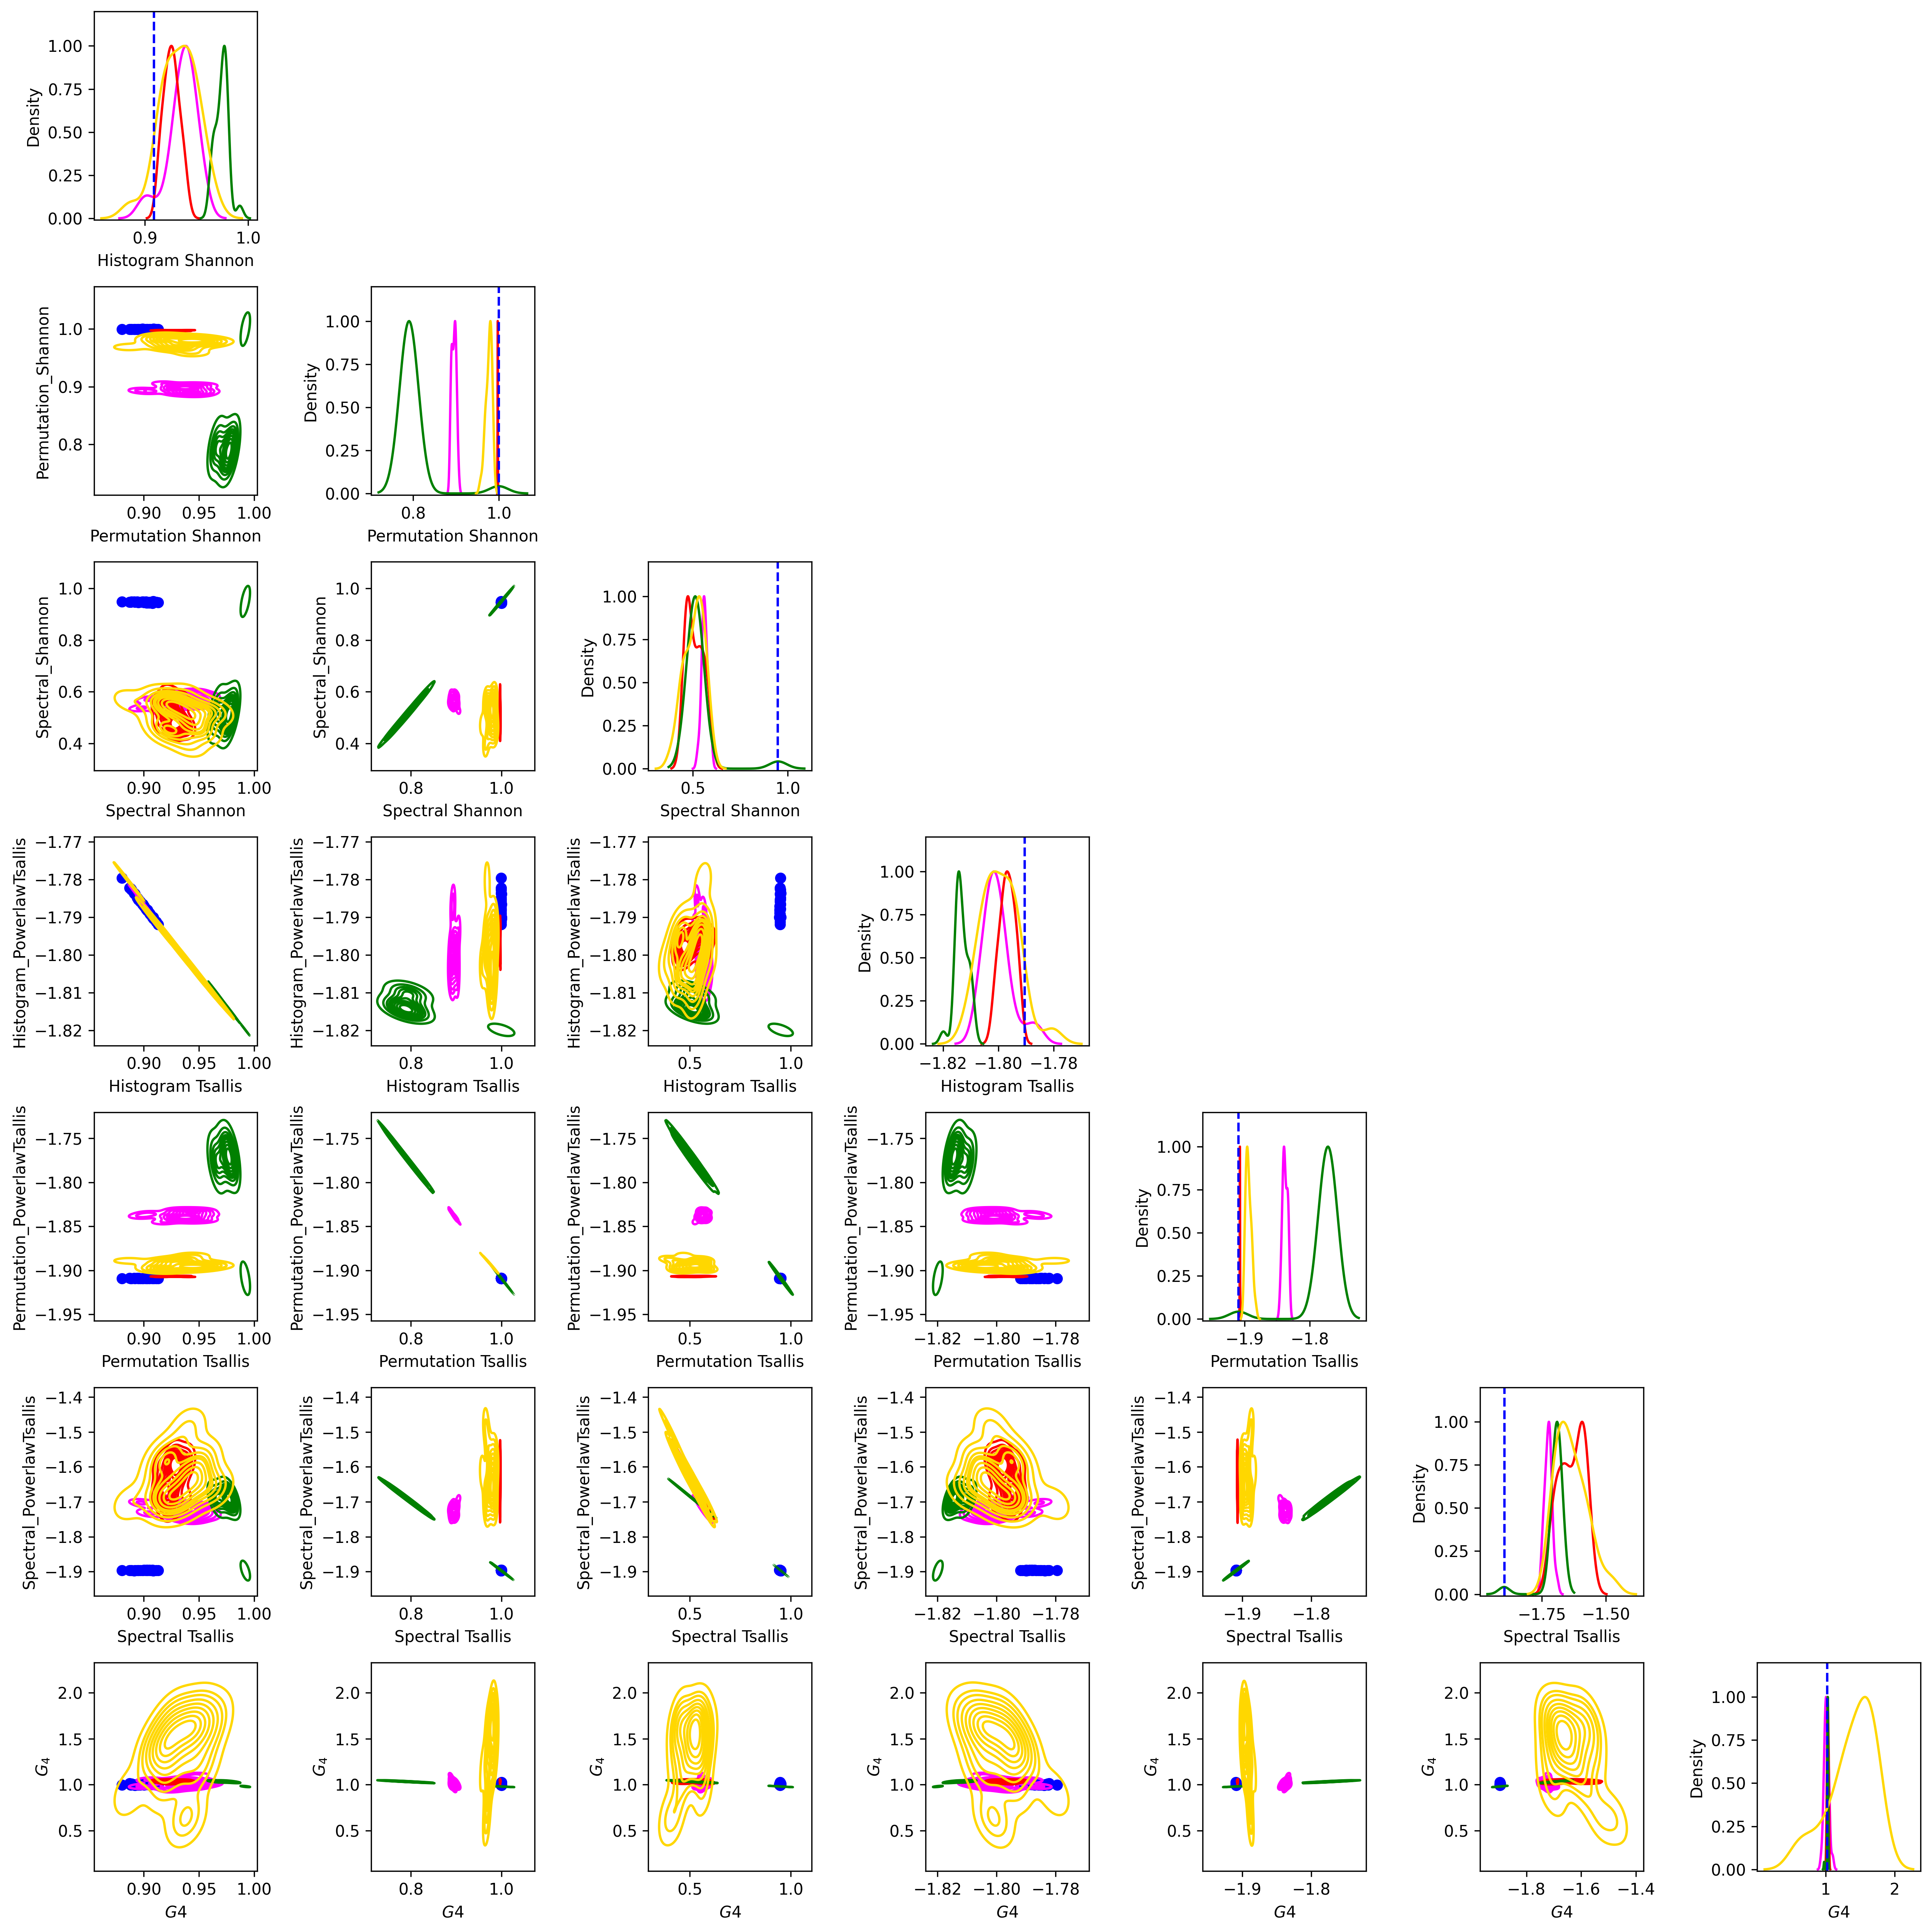

In [29]:
def normalize(arr, t_min, t_max):
    norm_arr = []
    diff = t_max - t_min
    diff_arr = max(arr) - min(arr)
    for i in arr:
        temp = (((i - min(arr))*diff)/diff_arr) + t_min
        norm_arr.append(temp)
    return norm_arr


names = randomH.columns.values.copy()
# for i in range(len(names)): names[i]= names[i].replace('_', ' ').replace('Powerlaw','')
gs = GridSpec(len(names),len(names))

plt.figure(figsize=(17,17),dpi=300)
for j in range(len(names)):
  for i in range( j, len(names)):
      plt.subplot(gs[i,j])
      if i==j:
        ax = sns.kdeplot(turbH[names[i]],color='magenta',common_norm=True)
        ax = sns.kdeplot(redNoiseH[names[i]],color='red',common_norm=True)
        ax = sns.kdeplot(cglH[names[i]],color='green',common_norm=True)
        ax = sns.kdeplot(jhH[names[i]],color='gold',common_norm=True)
        for line in ax.lines:
          line.set_ydata(normalize(line.get_ydata(),0,1))
        plt.axvline(randomH[names[i]].iloc[0],color='b',ls='--')
        plt.xlabel(names[i].replace('_', ' ').replace('Powerlaw',''))
        # plt.ylabel(names[j].replace('_', ' ').replace('Powerlaw',''))
        plt.ylim(-0.01,1.2)
      else:
        sns.kdeplot(turbH[[names[i],names[j]]],x=names[j],y=names[i]    ,color='magenta',fill=False)
        sns.kdeplot(redNoiseH[[names[i],names[j]]],x=names[j],y=names[i],color='red'    ,fill=False)
        sns.kdeplot(cglH[[names[i],names[j]]],x=names[j],y=names[i]     ,color='green'  ,fill=False)
        sns.kdeplot(jhH[[names[i],names[j]]],x=names[j],y=names[i]      ,color='gold'   ,fill=False)
        plt.scatter(randomH[names[j]],randomH[names[i]]                 ,color='b')
        plt.xlabel(names[i].replace('_', ' ').replace('Powerlaw',''))
        # plt.ylabel(names[j].replace('_', ' ').replace('Powerlaw',''))
# legend_elements = [
#                     Patch(facecolor='blue',    edgecolor='blue'      ,label='White Dynamic Noise'),
#                     Patch(facecolor='red',     edgecolor='red'        ,label='Red Dynamic Noise'),
#                     Patch(facecolor='green',   edgecolor='green'    ,label='Weak Turbulence'),
#                     Patch(facecolor='gold',    edgecolor='gold'      ,label='Fully Developed Turbulence'),
#                     Patch(facecolor='magenta', edgecolor='magenta',label='MHD Turbulence')]


# plt.legend(handles=legend_elements,fontsize=14,loc='best',bbox_to_anchor=(0.5,-1))
plt.tight_layout()
plt.savefig('all_entropys_spaces.pdf')
plt.show()

In [30]:
from sklearn import metrics
from scipy.stats import pearsonr

clusterName = []
silh = []
ij = []
names = randomH.columns.values.copy()
for j in range(len(names)):
  for i in range( j+1, len(names)):
    m1 = cglH[[names[i],names[j]]].sample(25)
    m2 = randomH[[names[i],names[j]]].sample(25)
    m3 = redNoiseH[[names[i],names[j]]].sample(25)
    m4 = turbH[[names[i],names[j]]].sample(25)
    m5 = jhH[[names[i],names[j]]].sample(25)

    m1["class"] = 1
    m2["class"] = 2
    m3["class"] = 3
    m4["class"] = 4
    m5["class"] = 5
    m = pd.concat([m1,m2,m3,m4,m5])
    sc = metrics.silhouette_score(m[[names[i],names[j]]], m["class"], metric='euclidean')
    corr,p= pearsonr(m[names[i]], m[names[j]])
    corr = 1-np.abs(corr)
    silh.append(np.round(corr*sc,5))
    clusterName.append( names[i]+" x "+names[j])
    ij.append([i,j])
seq = np.argsort(silh)
# for i in seq:
  # print(clusterName[i], silh[i],ij[i])

In [31]:
a = np.zeros((7,7))
for j in range(len(names)):
  for i in range( j+1, len(names)):

    m1 = cglH[[names[i],names[j]]].sample(25)
    m2 = randomH[[names[i],names[j]]].sample(25)
    m3 = redNoiseH[[names[i],names[j]]].sample(25)
    m4 = turbH[[names[i],names[j]]].sample(25)
    m5 = jhH[[names[i],names[j]]].sample(25)

    m1["class"] = 1
    m2["class"] = 2
    m3["class"] = 3
    m4["class"] = 4
    m5["class"] = 5
    m = pd.concat([m1,m2,m3,m4,m5])
    sc = metrics.silhouette_score(m[[names[i],names[j]]], m["class"], metric='euclidean')
    corr,p= pearsonr(m[names[i]], m[names[j]])
    corr = 1-np.abs(corr)
    a[i,j] = corr*sc
    a[j,i] = corr*sc
    print(names[i],names[j], corr*sc)

Permutation_Shannon Histogram_Shannon 0.12999519472607649
Spectral_Shannon Histogram_Shannon 0.13662137805465155
Histogram_PowerlawTsallis Histogram_Shannon 0.00021266089737146412
Permutation_PowerlawTsallis Histogram_Shannon 0.11900958771516822
Spectral_PowerlawTsallis Histogram_Shannon 0.21060855252442412
$G_4$ Histogram_Shannon 0.32826312745689995
Spectral_Shannon Permutation_Shannon 0.3247309760423059
Histogram_PowerlawTsallis Permutation_Shannon 0.1626679846829572
Permutation_PowerlawTsallis Permutation_Shannon 0.00026080270318385986
Spectral_PowerlawTsallis Permutation_Shannon 0.4577385662626583
$G_4$ Permutation_Shannon 0.43651135042920397
Histogram_PowerlawTsallis Spectral_Shannon 0.1195775265647259
Permutation_PowerlawTsallis Spectral_Shannon 0.29707296104091446
Spectral_PowerlawTsallis Spectral_Shannon 0.01668166295931205
$G_4$ Spectral_Shannon 0.2723400127355179
Permutation_PowerlawTsallis Histogram_PowerlawTsallis 0.15614153802598202
Spectral_PowerlawTsallis Histogram_Power

<Figure size 1500x1200 with 0 Axes>

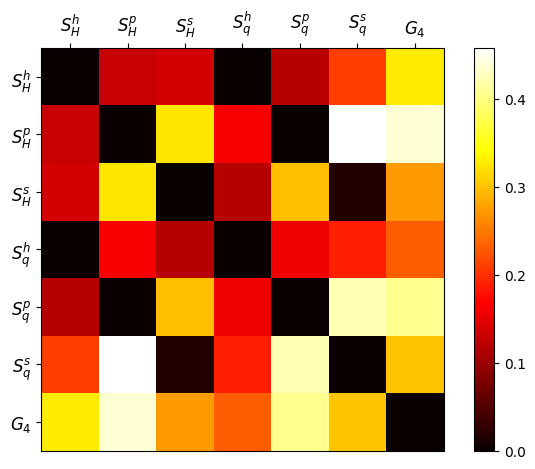

In [32]:
plt.figure(figsize=(5,4),dpi=300)


fig, ax = plt.subplots()
cax= ax.imshow(a, cmap='hot')  # Plot the data

# Greek letters for labels
greek_letters = ['$S^h_H$', '$S^p_H$','$S^s_H$','$S^h_q$','$S^p_q$','$S^s_q$','$G_4$']

# Set the Greek letters as tick labels
ax.set_xticks(range(len(greek_letters)))
ax.set_yticks(range(len(greek_letters)))
ax.set_xticklabels(greek_letters,size=12)
ax.set_yticklabels(greek_letters,size=12)
# Move the x-axis tick labels to the top
ax.xaxis.set_ticks_position('top')

plt.colorbar(cax)
plt.tight_layout()
plt.savefig('Silhueta.pdf')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'level'
  cset = contour_func(
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'level'
  cset = contour_func(
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'level'
  cset = contour_func(
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'level'
  cset = contour_func(
<ipython-input-33-cad539cae506>:112: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


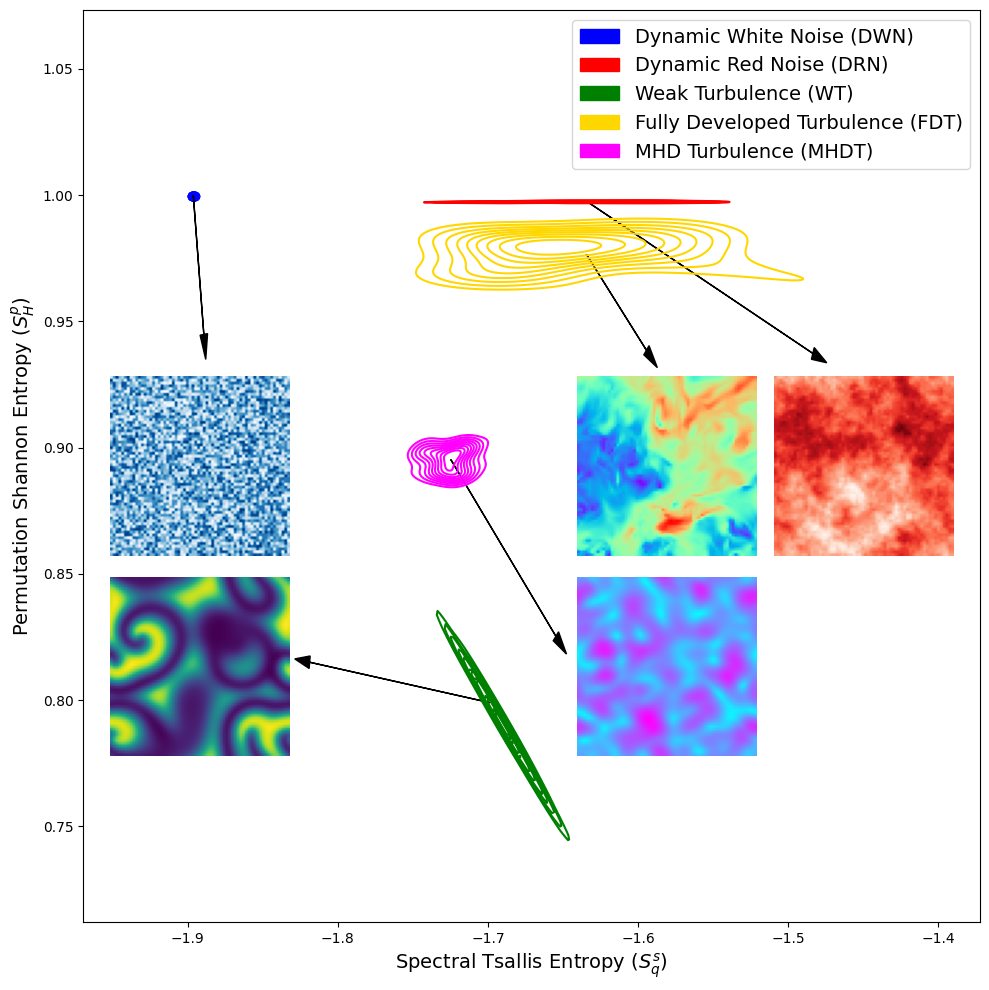

In [33]:


i=1
j=5
plt.figure(figsize=(10,10))

# canonicos
plt.scatter(randomH[names[j]],randomH[names[i]],color='b')
sns.kdeplot(redNoiseH[[names[i],names[j]]],x=names[j],y=names[i],color='red'    ,fill=False,thresh=.2,level=3)
sns.kdeplot(cglH[[names[i],names[j]]],x=names[j],y=names[i]     ,color='green'  ,fill=False,thresh=.2,level=3)
sns.kdeplot(jhH[[names[i],names[j]]],x=names[j],y=names[i]      ,color='gold'   ,fill=False,thresh=.2,level=3)
sns.kdeplot(turbH[[names[i],names[j]]],x=names[j],y=names[i]    ,color='magenta',fill=False,thresh=.2,level=3)

plt.xlabel(names[j].replace('_', ' ').replace('Powerlaw','')+r" Entropy ($S^s_q$)",fontsize=14)
plt.ylabel(names[i].replace('_', ' ').replace('Powerlaw','')+r" Entropy ($S^p_H$)",fontsize=14)



# INSERT IMAGES
image1 = snap[0]
# image2 = m[1]
image3 = snap[-490]
image4 = getJHTDBIso(24)
image5 = readMod(5)

cmap1 = 'Blues'
cmap2 = 'Reds'
cmap4 = 'rainbow'
cmap5 = 'cool'

Width,Height = 1,1

delta = 0.22

img1x,img1y = -0.37,0
img2x,img2y = 0.37,0
img3x,img3y = -0.37,-delta
img4x,img4y = 0.15,0
img5x,img5y = 0.15,-delta

# Create axes for images
ax = plt.gca()
# ax_img1 = inset_locator.inset_axes(ax, width="20%", height="20%", loc='center')
ax_img1 = inset_locator.inset_axes(ax, width="20%", height="20%", loc='center',
                                    bbox_to_anchor=(img1x, img1y, Width, Height),
                                    bbox_transform=ax.transAxes)

ax_img2 = inset_locator.inset_axes(ax, width="20%", height="20%", loc='center',
                                    bbox_to_anchor=(img2x, img2y, Width, Height),
                                    bbox_transform=ax.transAxes)

ax_img3 = inset_locator.inset_axes(ax, width="20%", height="20%", loc='center',
                                    bbox_to_anchor=(img3x, img3y, Width, Height),
                                    bbox_transform=ax.transAxes)

ax_img4 = inset_locator.inset_axes(ax, width="20%", height="20%", loc='center',
                                    bbox_to_anchor=(img4x, img4y, Width, Height),
                                    bbox_transform=ax.transAxes)

ax_img5 = inset_locator.inset_axes(ax, width="20%", height="20%", loc='center',
                                    bbox_to_anchor=(img5x, img5y, Width, Height),
                                    bbox_transform=ax.transAxes)

# Display images
ax_img1.imshow(image1,cmap=cmap1)
ax_img2.imshow(image2,cmap=cmap2)
ax_img3.imshow(image3)#,cmap=cmap3)
ax_img4.imshow(image4,cmap=cmap4)
ax_img5.imshow(image5,cmap=cmap5)

ax_img1.axis('off')
ax_img2.axis('off')
ax_img3.axis('off')
ax_img4.axis('off')
ax_img5.axis('off')

# Add arrows and annotations

head_width=0.005
head_length=0.01
width=0.00003


ax.arrow(randomH[names[j]][0],randomH[names[i]][0],
         0.007,-0.055,
         head_width=head_width, head_length=head_length, width=width, fc='k', ec='k')

ax.arrow(redNoiseH[[names[i],names[j]]].mean()[1],redNoiseH[[names[i],names[j]]].mean()[0],
         0.15,-0.06,
         head_width=head_width, head_length=head_length, width=width, fc='k', ec='k')

ax.arrow(cglH[[names[i],names[j]]].mean()[1],cglH[[names[i],names[j]]].mean()[0],
         -0.12,0.016,
         head_width=head_width, head_length=head_length, width=width, fc='k', ec='k')

ax.arrow(jhH[[names[i],names[j]]].mean()[1],jhH[[names[i],names[j]]].mean()[0],
         0.04,-0.038,
         head_width=head_width, head_length=head_length, width=width, fc='k', ec='k')

ax.arrow(turbH[[names[i],names[j]]].mean()[1],turbH[[names[i],names[j]]].mean()[0],
         0.07,-0.07,
         head_width=head_width, head_length=head_length, width=width, fc='k', ec='k')


legend_elements = [
                    Patch(facecolor='blue',    edgecolor='blue'      ,label='Dynamic White Noise (DWN)'),
                    Patch(facecolor='red',     edgecolor='red'        ,label='Dynamic Red Noise (DRN)'),
                    Patch(facecolor='green',   edgecolor='green'    ,label='Weak Turbulence (WT)'),
                    Patch(facecolor='gold',    edgecolor='gold'      ,label='Fully Developed Turbulence (FDT)'),
                    Patch(facecolor='magenta', edgecolor='magenta',label='MHD Turbulence (MHDT)')]


ax.legend(handles=legend_elements,fontsize=14)
plt.tight_layout()
plt.savefig('kde.pdf')
plt.show()

In [34]:
# import matplotlib.pyplot as plt
# from matplotlib.lines import Line2D
# from matplotlib.patches import Patch

# legend_elements = [
#                     Patch(facecolor='blue', edgecolor='blue'      ,label='White Dynamic Noise'),
#                     Patch(facecolor='red', edgecolor='red'        ,label='Red Dynamic Noise'),
#                     Patch(facecolor='green', edgecolor='green'    ,label='Weak Turbulence'),
#                     Patch(facecolor='gold', edgecolor='gold'      ,label='Fully Developed Turbulence'),
#                     Patch(facecolor='magenta', edgecolor='magenta',label='MHD Turbulence'),


#                     #Line2D([0], [0], marker='o', color='w', label='PLUTO',markerfacecolor='k', markersize=15),
#                     #Line2D([0], [0], marker='o', color='w', label='CAMELIA',markerfacecolor='orange', markersize=15),
#                     #Line2D([0], [0], marker='*', color='w', label='Milli-Millenium',markerfacecolor='yellow',markeredgecolor='k', markersize=15),
#                    ]

# # Create the figure
# fig, ax = plt.subplots()
# ax.legend(handles=legend_elements, loc='center',fontsize=20)

# plt.show()

In [35]:
# i=1
# j=5

# seq = np.arange(len(cglH[names[j]]))

# plt.figure(figsize=(12,10))

# plt.scatter(cglH[names[j]],cglH[names[i]],c=seq,s=10, cmap='rainbow')
# plt.xlabel(names[j].replace('_', ' ').replace('Powerlaw',''),fontsize=18)
# plt.ylabel(names[i].replace('_', ' ').replace('Powerlaw',''),fontsize=18)
# plt.colorbar()

# plt.show()

In [36]:
# i=1
# j=5

# seq = np.arange(len(cglH[names[j]]))


# plt.figure(figsize=(10,10))

# plt.scatter(cglH[names[j]],cglH[names[i]],c=seq,s=100, cmap='rainbow')
# plt.xlim(-1.73,-1.67)
# plt.ylim(0.7825,0.825)
# plt.show()

In [37]:
# i=1
# j=5

# seq = np.arange(len(cglH[names[j]]))


# plt.figure(figsize=(10,10))

# plt.scatter(cglH[names[j]],cglH[names[i]],c=seq,s=100, cmap='rainbow')
# plt.xlim(-1.88,-1.92)
# plt.ylim(0.99,1.1)
# plt.show()

<ipython-input-38-0a1cd955b700>:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


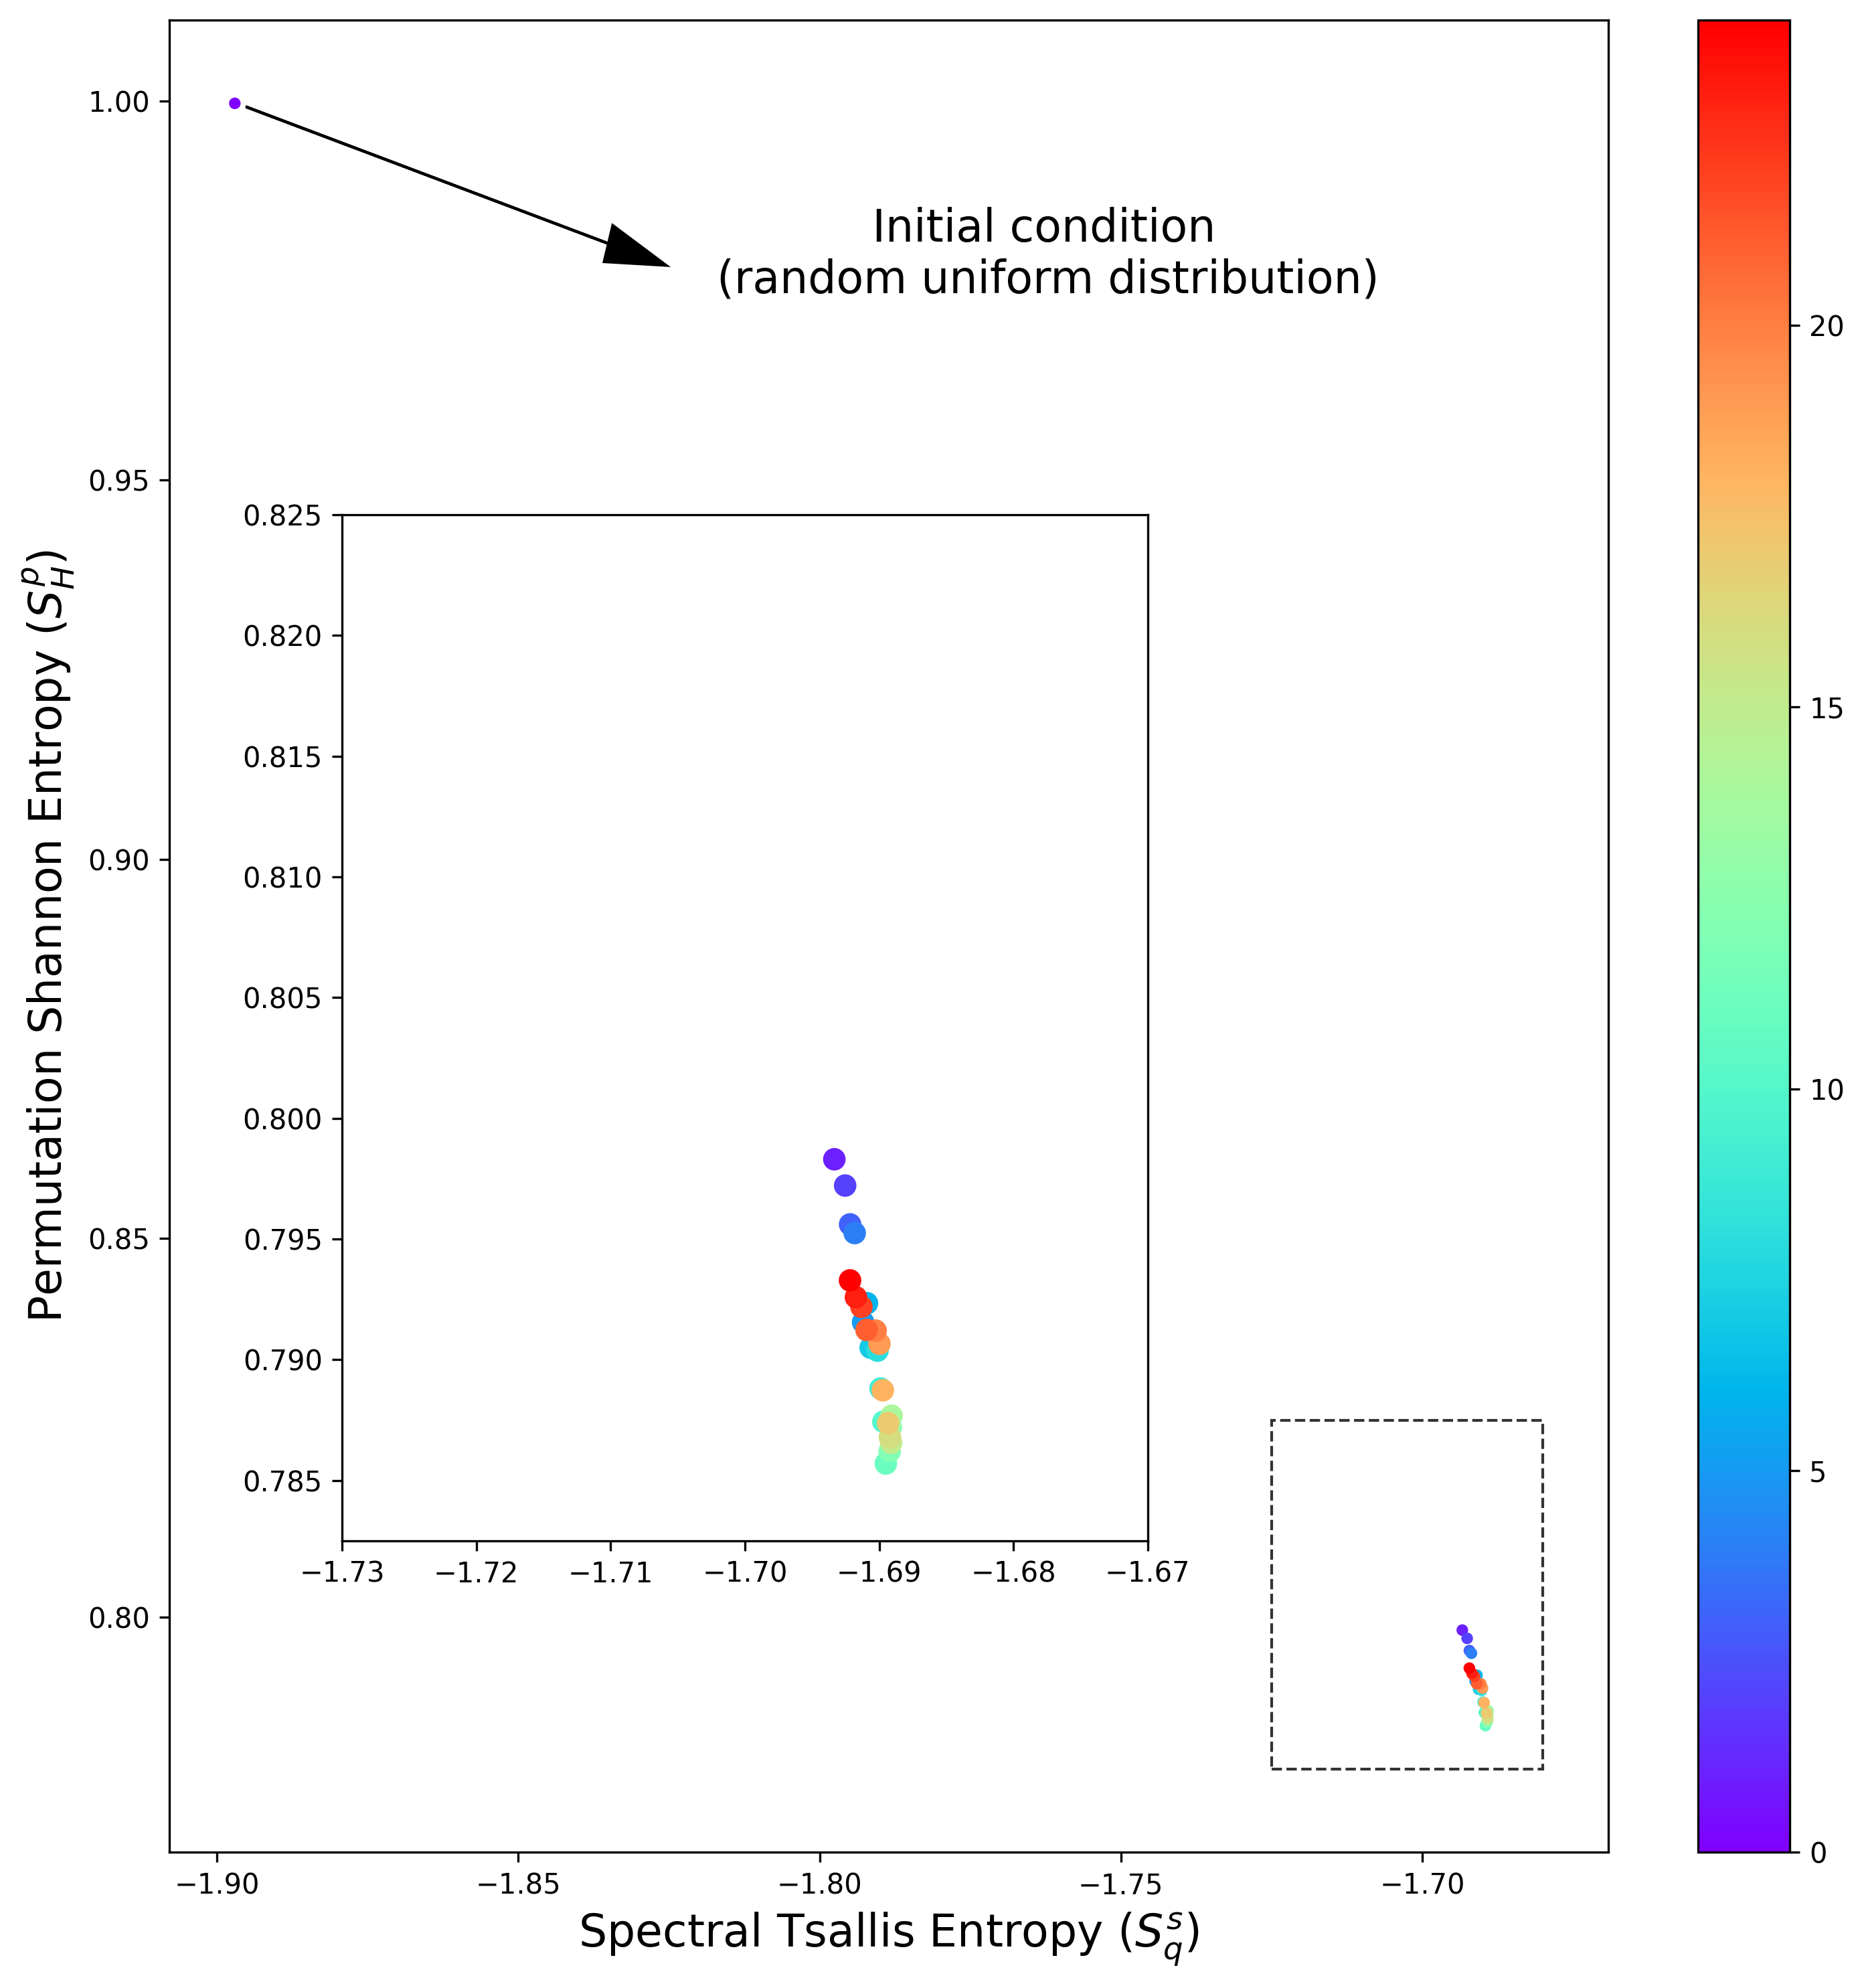

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

i=1
j=5

seq = np.arange(len(cglH[names[j]]))

# Assuming cglH is your DataFrame and names is a list of column names


# Create the main plot
plt.figure(figsize=(10, 10),dpi=300)
plt.scatter(cglH[names[j]], cglH[names[i]], c=seq, s=10, cmap='rainbow')

plt.xlabel(names[j].replace('_', ' ').replace('Powerlaw','')+r" Entropy ($S^s_q$)",fontsize=16)
plt.ylabel(names[i].replace('_', ' ').replace('Powerlaw','')+r" Entropy ($S^p_H$)",fontsize=16)

plt.colorbar()

# Create an inset axes at a specific position
# bbox_to_anchor = [x, y, width, height]
# x, y, width, height are in figure fraction (0 to 1)
ax = plt.gca()
ax_inset = inset_axes(ax, width="70%", height="70%", loc='center',
                      bbox_to_anchor=[0.0, 0.05, 0.8,0.8], bbox_transform=ax.transAxes)

# Plot the zoomed-in view in the inset plot
ax_inset.scatter(cglH[names[j]], cglH[names[i]], c=seq, s=50, cmap='rainbow')
ax_inset.set_xlim(-1.73, -1.67)
ax_inset.set_ylim(0.7825, 0.825)

someX, someY = max(cglH[names[j]]), max(cglH[names[i]])
ax.add_patch(Rectangle((-1.725, 0.78), 0.045, 0.046, fill=None, alpha=0.8,linestyle='--'))

delta_x = 0.002
delta_y = 0.0005
ax.arrow(cglH[names[j]][0]+delta_x, cglH[names[i]][0]-delta_y,
         0.06,-0.018,
         head_width=head_width, head_length=head_length, width=width, fc='k', ec='k')
ax.text(cglH[names[j]][0]+0.08, cglH[names[i]][0]-0.025,'           Initial condition\n(random uniform distribution)',size=16)
plt.tight_layout()
plt.savefig('dynamical_analysis.pdf')
plt.show()


# CNMAC Aplication

## Data

In [70]:
betas = [2,-1,0,1,2]

cube_noise = []
for i in range(len(betas)):
  cube_noise.append(NCGL.cNoise(betas[i],[25,64,64]))

In [53]:
series_noise = []
for i in range(len(betas)):
  series_noise.append(NCGL.cNoise(betas[i],[25,1024]))

In [54]:
np.shape(series_noise)


(5, 25, 1024)

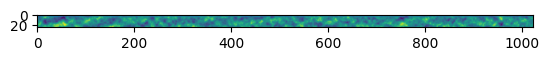

In [55]:
plt.plot(series_noise[0][0])
plt.imshow(series_noise[0])

In [56]:
color_maps = ['Purples','Blues','Greys','RdPu','Reds']
color_lines = ['violet','blue' ,'black'  ,'pink','red']

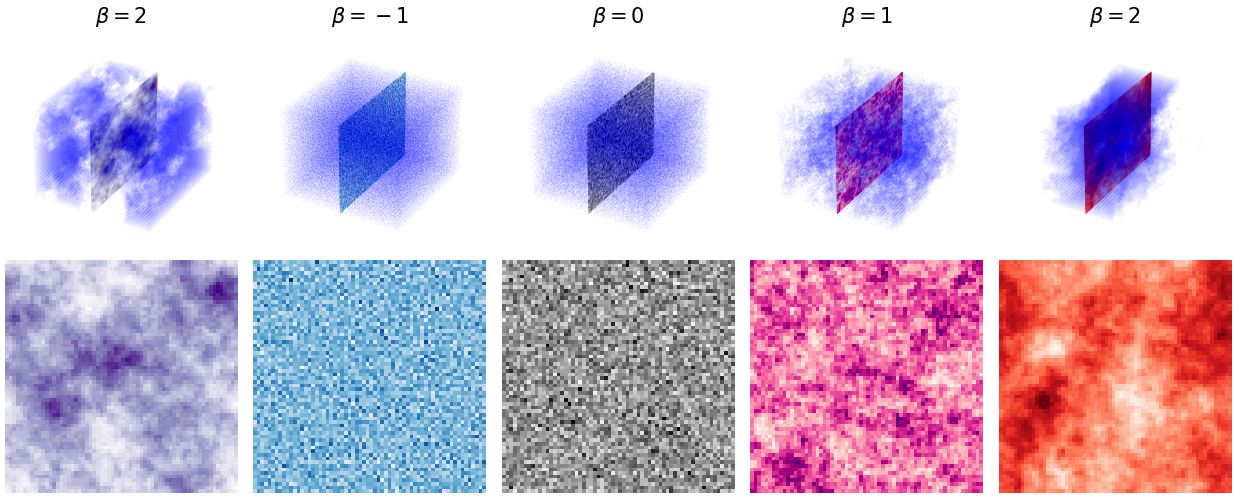

In [57]:


# Create a larger figure for better visualization
fig = plt.figure(figsize=(25, 10),dpi=50)
# betas = np.linspace(1, 5, 5)

for i, beta in enumerate(betas):
    noise_cube = cube_noise[i]
    selected_slice =noise_cube.shape[0]//2

    # Plot 3D noise cube in the first row
    ax = fig.add_subplot(2, 5, i+1, projection='3d')
    x, y, z = np.indices(noise_cube.shape)
    mask = noise_cube > noise_cube.mean() + 0.2 * noise_cube.std()
    ax.scatter(x[mask], y[mask], z[mask], alpha=0.05, color='blue',s=0.3)

    # Extract the selected slice for 3D plotting
    central_slice = noise_cube[selected_slice, :, :]
    Y, Z = np.meshgrid(range(64), range(64))
    X = np.full(Y.shape, selected_slice)

    # Plot the selected slice on the 3D plot
    # colors = plt.cm.viridis((central_slice - central_slice.min()) / (central_slice.max() - central_slice.min()))
    color_map = getattr(plt.cm, color_maps[i])
    colors = color_map((central_slice - central_slice.min()) / (central_slice.max() - central_slice.min()))
    ax.plot_surface(X, Y, Z, facecolors=colors, rstride=1, cstride=1, shade=False,alpha=0.5)

    ax.set_title(f'$\\beta = {betas[i]:.0f}$',size=30)
    ax.axis('off')

    # Plot 2D slice in the second row
    ax2 = fig.add_subplot(2, 5, i+6)
    ax2.imshow(np.flipud(central_slice), cmap=color_maps[i])
    # ax2.set_title(f'$\\beta = {betas[i]:.2f}$')
    ax2.axis('off')

plt.tight_layout()
plt.savefig(f'cube_noise.png')

plt.show()


## Analyse

In [71]:
def eta_df(cube,ranges):
  df =[]
  for i in tqdm.tqdm(range(ranges)):
    s = cube[i]
    d = eta.entropy(s)
    gpaRes = ga(s,moment=['G4'])
    d['$G_4$'] = np.real(np.absolute(gpaRes['G4']))
    df.append(d)
  return pd.DataFrame(df)


In [72]:
ranges = np.shape(cube_noise)[1]
df_violet = eta_df(cube_noise[0],ranges)
df_blue   = eta_df(cube_noise[1],ranges)
df_white  = eta_df(cube_noise[2],ranges)
df_pink   = eta_df(cube_noise[3],ranges)
df_red    = eta_df(cube_noise[4],ranges)

100%|██████████| 25/25 [00:04<00:00,  5.92it/s]


/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'level'
  cset = contour_func(
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'level'
  cset = contour_func(
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'level'
  cset = contour_func(
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'level'
  cset = contour_func(
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'level'
  cset = contour_func(


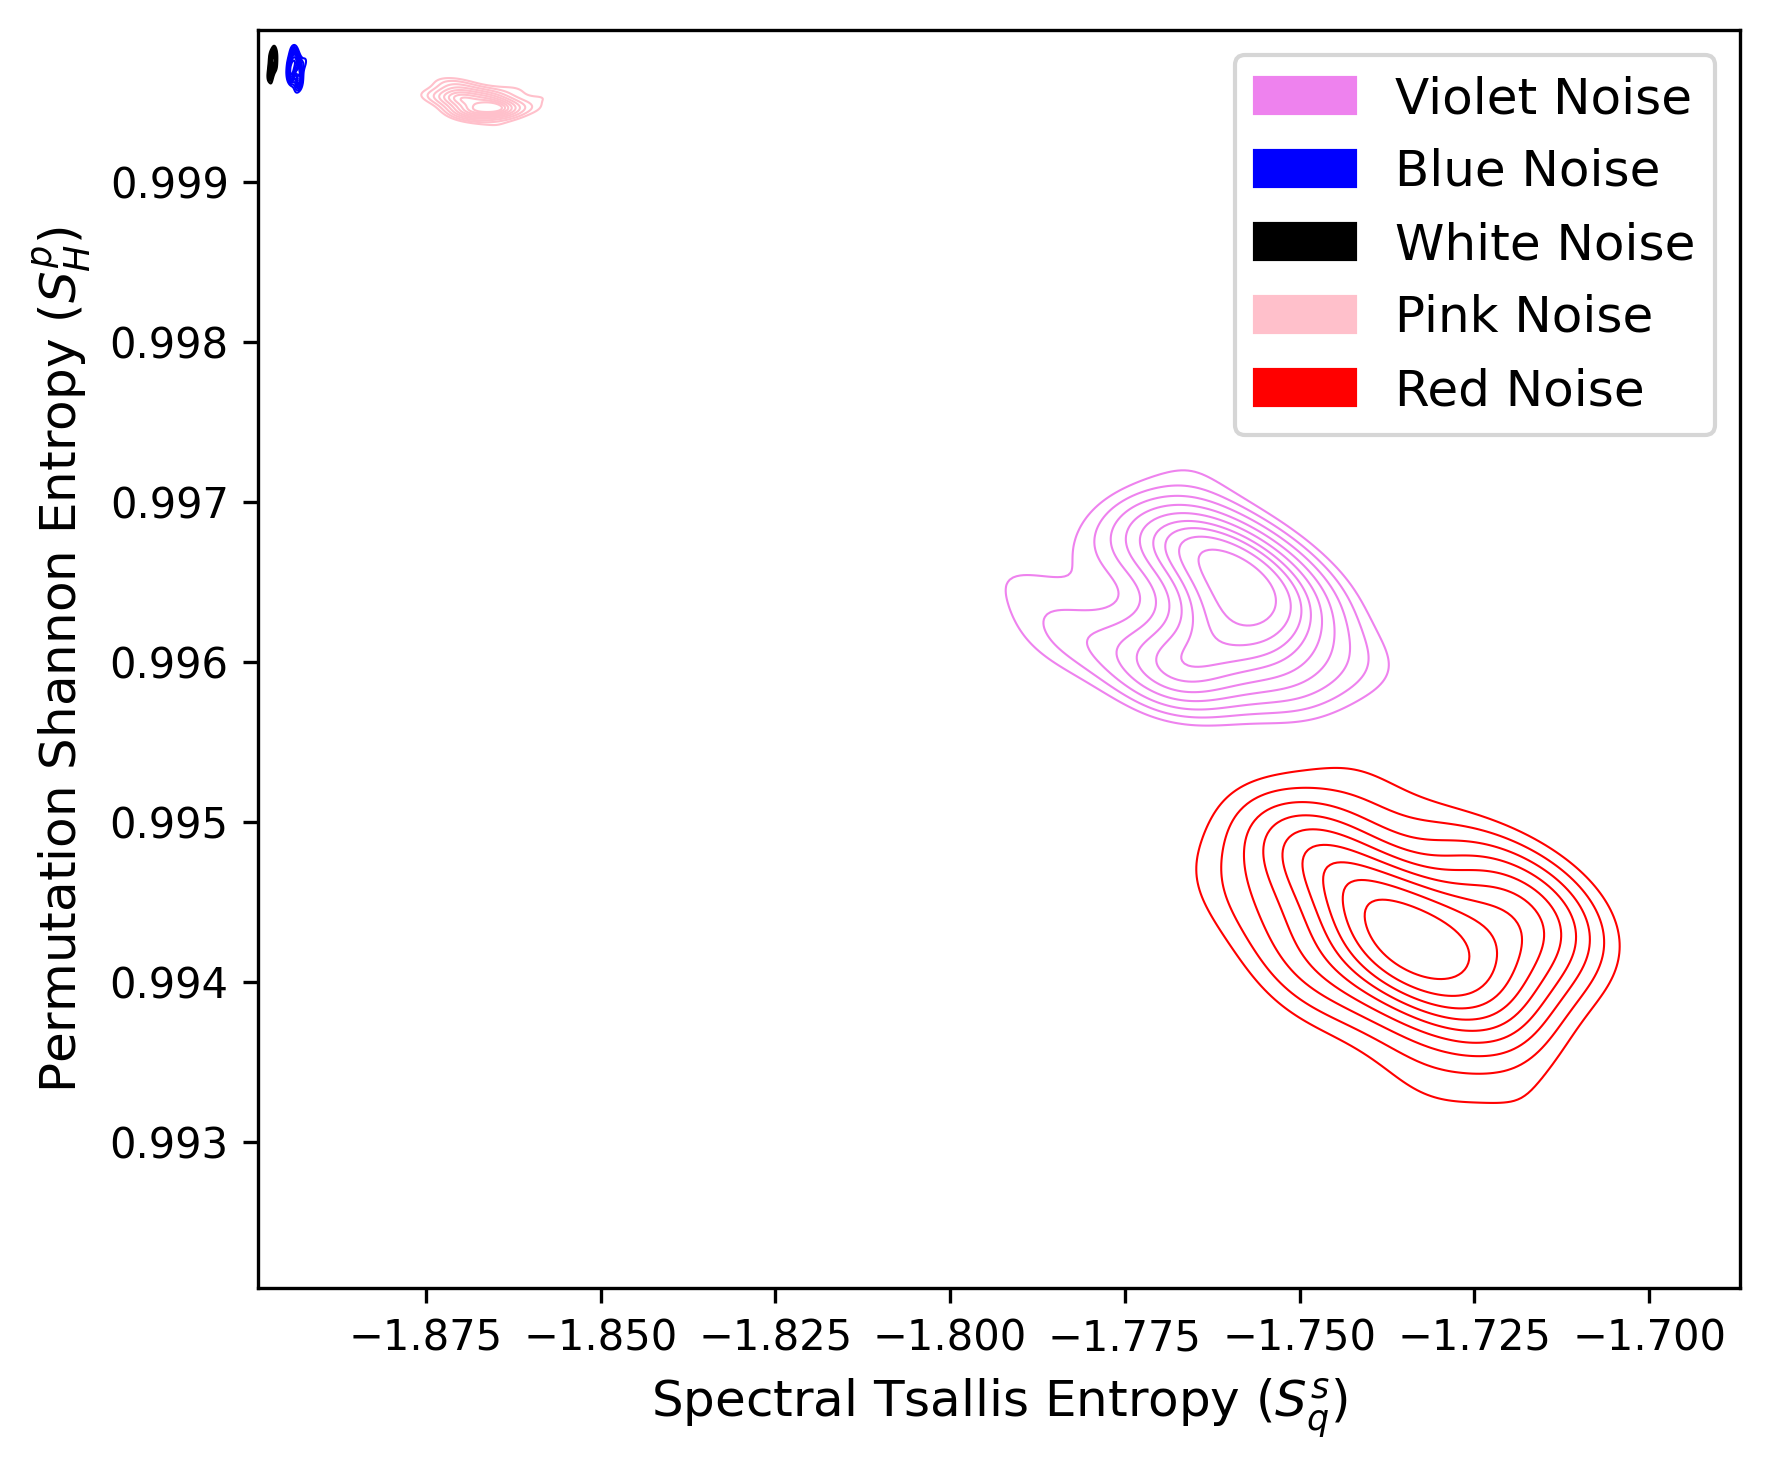

In [73]:
i=1
j=5
fontsize = 12
plt.figure(figsize=(6,5),dpi=300)

# canonicos
# plt.scatter(randomH[names[j]],randomH[names[i]],color='b')

sns.kdeplot(df_violet[[names[i],names[j]]],x=names[j],y=names[i]  ,color= color_lines[0] ,fill=False,thresh=.2,level=3, linewidths=0.5)
sns.kdeplot(df_blue[[names[i],names[j]]],x=names[j],y=names[i]    ,color= color_lines[1] ,fill=False,thresh=.2,level=3, linewidths=0.5)
sns.kdeplot(df_white[[names[i],names[j]]],x=names[j],y=names[i]   ,color= color_lines[2] ,fill=False,thresh=.2,level=3, linewidths=0.5)
sns.kdeplot(df_pink[[names[i],names[j]]],x=names[j],y=names[i]    ,color= color_lines[3] ,fill=False,thresh=.2,level=3, linewidths=0.5)
sns.kdeplot(df_red[[names[i],names[j]]],x=names[j],y=names[i]     ,color= color_lines[4] ,fill=False,thresh=.2,level=3, linewidths=0.5)

plt.xlabel(names[j].replace('_', ' ').replace('Powerlaw','')+r" Entropy ($S^s_q$)",fontsize=fontsize)
plt.ylabel(names[i].replace('_', ' ').replace('Powerlaw','')+r" Entropy ($S^p_H$)",fontsize=fontsize)



# # INSERT IMAGES
# image1 = cube_noise[0][selected_slice]
# image2 = cube_noise[1][selected_slice]
# image3 = cube_noise[2][selected_slice]
# image4 = cube_noise[3][selected_slice]
# image5 = cube_noise[4][selected_slice]

# cmap1 = color_maps[0]
# cmap2 = color_maps[1]
# cmap3 = color_maps[2]
# cmap4 = color_maps[3]
# cmap5 = color_maps[4]

# Width,Height = 1,1

# delta = 0.22

# img1x,img1y = -0.37,0
# img2x,img2y = 0.37,0
# img3x,img3y = -0.37,-delta
# img4x,img4y = 0.15,0
# img5x,img5y = 0.15,-delta

# # Create axes for images
ax = plt.gca()
# # ax_img1 = inset_locator.inset_axes(ax, width="20%", height="20%", loc='center')
# ax_img1 = inset_locator.inset_axes(ax, width="20%", height="20%", loc='center',
#                                     bbox_to_anchor=(img1x, img1y, Width, Height),
#                                     bbox_transform=ax.transAxes)

# ax_img2 = inset_locator.inset_axes(ax, width="20%", height="20%", loc='center',
#                                     bbox_to_anchor=(img2x, img2y, Width, Height),
#                                     bbox_transform=ax.transAxes)

# ax_img3 = inset_locator.inset_axes(ax, width="20%", height="20%", loc='center',
#                                     bbox_to_anchor=(img3x, img3y, Width, Height),
#                                     bbox_transform=ax.transAxes)

# ax_img4 = inset_locator.inset_axes(ax, width="20%", height="20%", loc='center',
#                                     bbox_to_anchor=(img4x, img4y, Width, Height),
#                                     bbox_transform=ax.transAxes)

# ax_img5 = inset_locator.inset_axes(ax, width="20%", height="20%", loc='center',
#                                     bbox_to_anchor=(img5x, img5y, Width, Height),
#                                     bbox_transform=ax.transAxes)

# Display images
# ax_img1.imshow(image1,cmap=cmap1)
# ax_img2.imshow(image2,cmap=cmap2)
# ax_img3.imshow(image3,cmap=cmap3)
# ax_img4.imshow(image4,cmap=cmap4)
# ax_img5.imshow(image5,cmap=cmap5)

# ax_img1.axis('off')
# ax_img2.axis('off')
# ax_img3.axis('off')
# ax_img4.axis('off')
# ax_img5.axis('off')

# # Add arrows and annotations

# head_width=0.005
# head_length=0.01
# width=0.0000


# ax.arrow(randomH[names[j]][0],randomH[names[i]][0],
#          0.007,-0.055,
#          head_width=head_width, head_length=head_length, width=width, fc='k', ec='k')

# ax.arrow(df_red[[names[i],names[j]]].mean()[1],df_red[[names[i],names[j]]].mean()[0],
#          0.15,-0.06,
#          head_width=head_width, head_length=head_length, width=width, fc='k', ec='k')

# ax.arrow(df_blue[[names[i],names[j]]].mean()[1],df_blue[[names[i],names[j]]].mean()[0],
#          -0.12,0.016,
#          head_width=head_width, head_length=head_length, width=width, fc='k', ec='k')

# ax.arrow(df_white[[names[i],names[j]]].mean()[1],df_white[[names[i],names[j]]].mean()[0],
#          0.04,-0.038,
#          head_width=head_width, head_length=head_length, width=width, fc='k', ec='k')

# ax.arrow(df_pink[[names[i],names[j]]].mean()[1],df_pink[[names[i],names[j]]].mean()[0],
#          0.07,-0.07,
#          head_width=head_width, head_length=head_length, width=width, fc='k', ec='k')


legend_elements = [
                    Patch(facecolor = color_lines[0],edgecolor=color_lines[0],label='Violet Noise'),
                    Patch(facecolor = color_lines[1],edgecolor=color_lines[1],label='Blue Noise'),
                    Patch(facecolor = color_lines[2],edgecolor=color_lines[2],label='White Noise'),
                    Patch(facecolor = color_lines[3],edgecolor=color_lines[3],label='Pink Noise'),
                    Patch(facecolor = color_lines[4],edgecolor=color_lines[4],label='Red Noise')]


ax.legend(handles=legend_elements,fontsize=fontsize)
plt.tight_layout()
plt.savefig('cube_kde_noise.pdf')
# plt.xlim(-2,-0.6)
# plt.ylim(0.4,1.05)
# plt.legend()
plt.show()

In [62]:
def normalize(arr, t_min, t_max):
    norm_arr = []
    diff = t_max - t_min
    diff_arr = max(arr) - min(arr)
    for i in arr:
        temp = (((i - min(arr))*diff)/diff_arr) + t_min
        norm_arr.append(temp)
    return norm_arr



In [63]:
names

array(['Histogram_Shannon', 'Permutation_Shannon', 'Spectral_Shannon',
       'Histogram_PowerlawTsallis', 'Permutation_PowerlawTsallis',
       'Spectral_PowerlawTsallis', '$G_4$'], dtype=object)

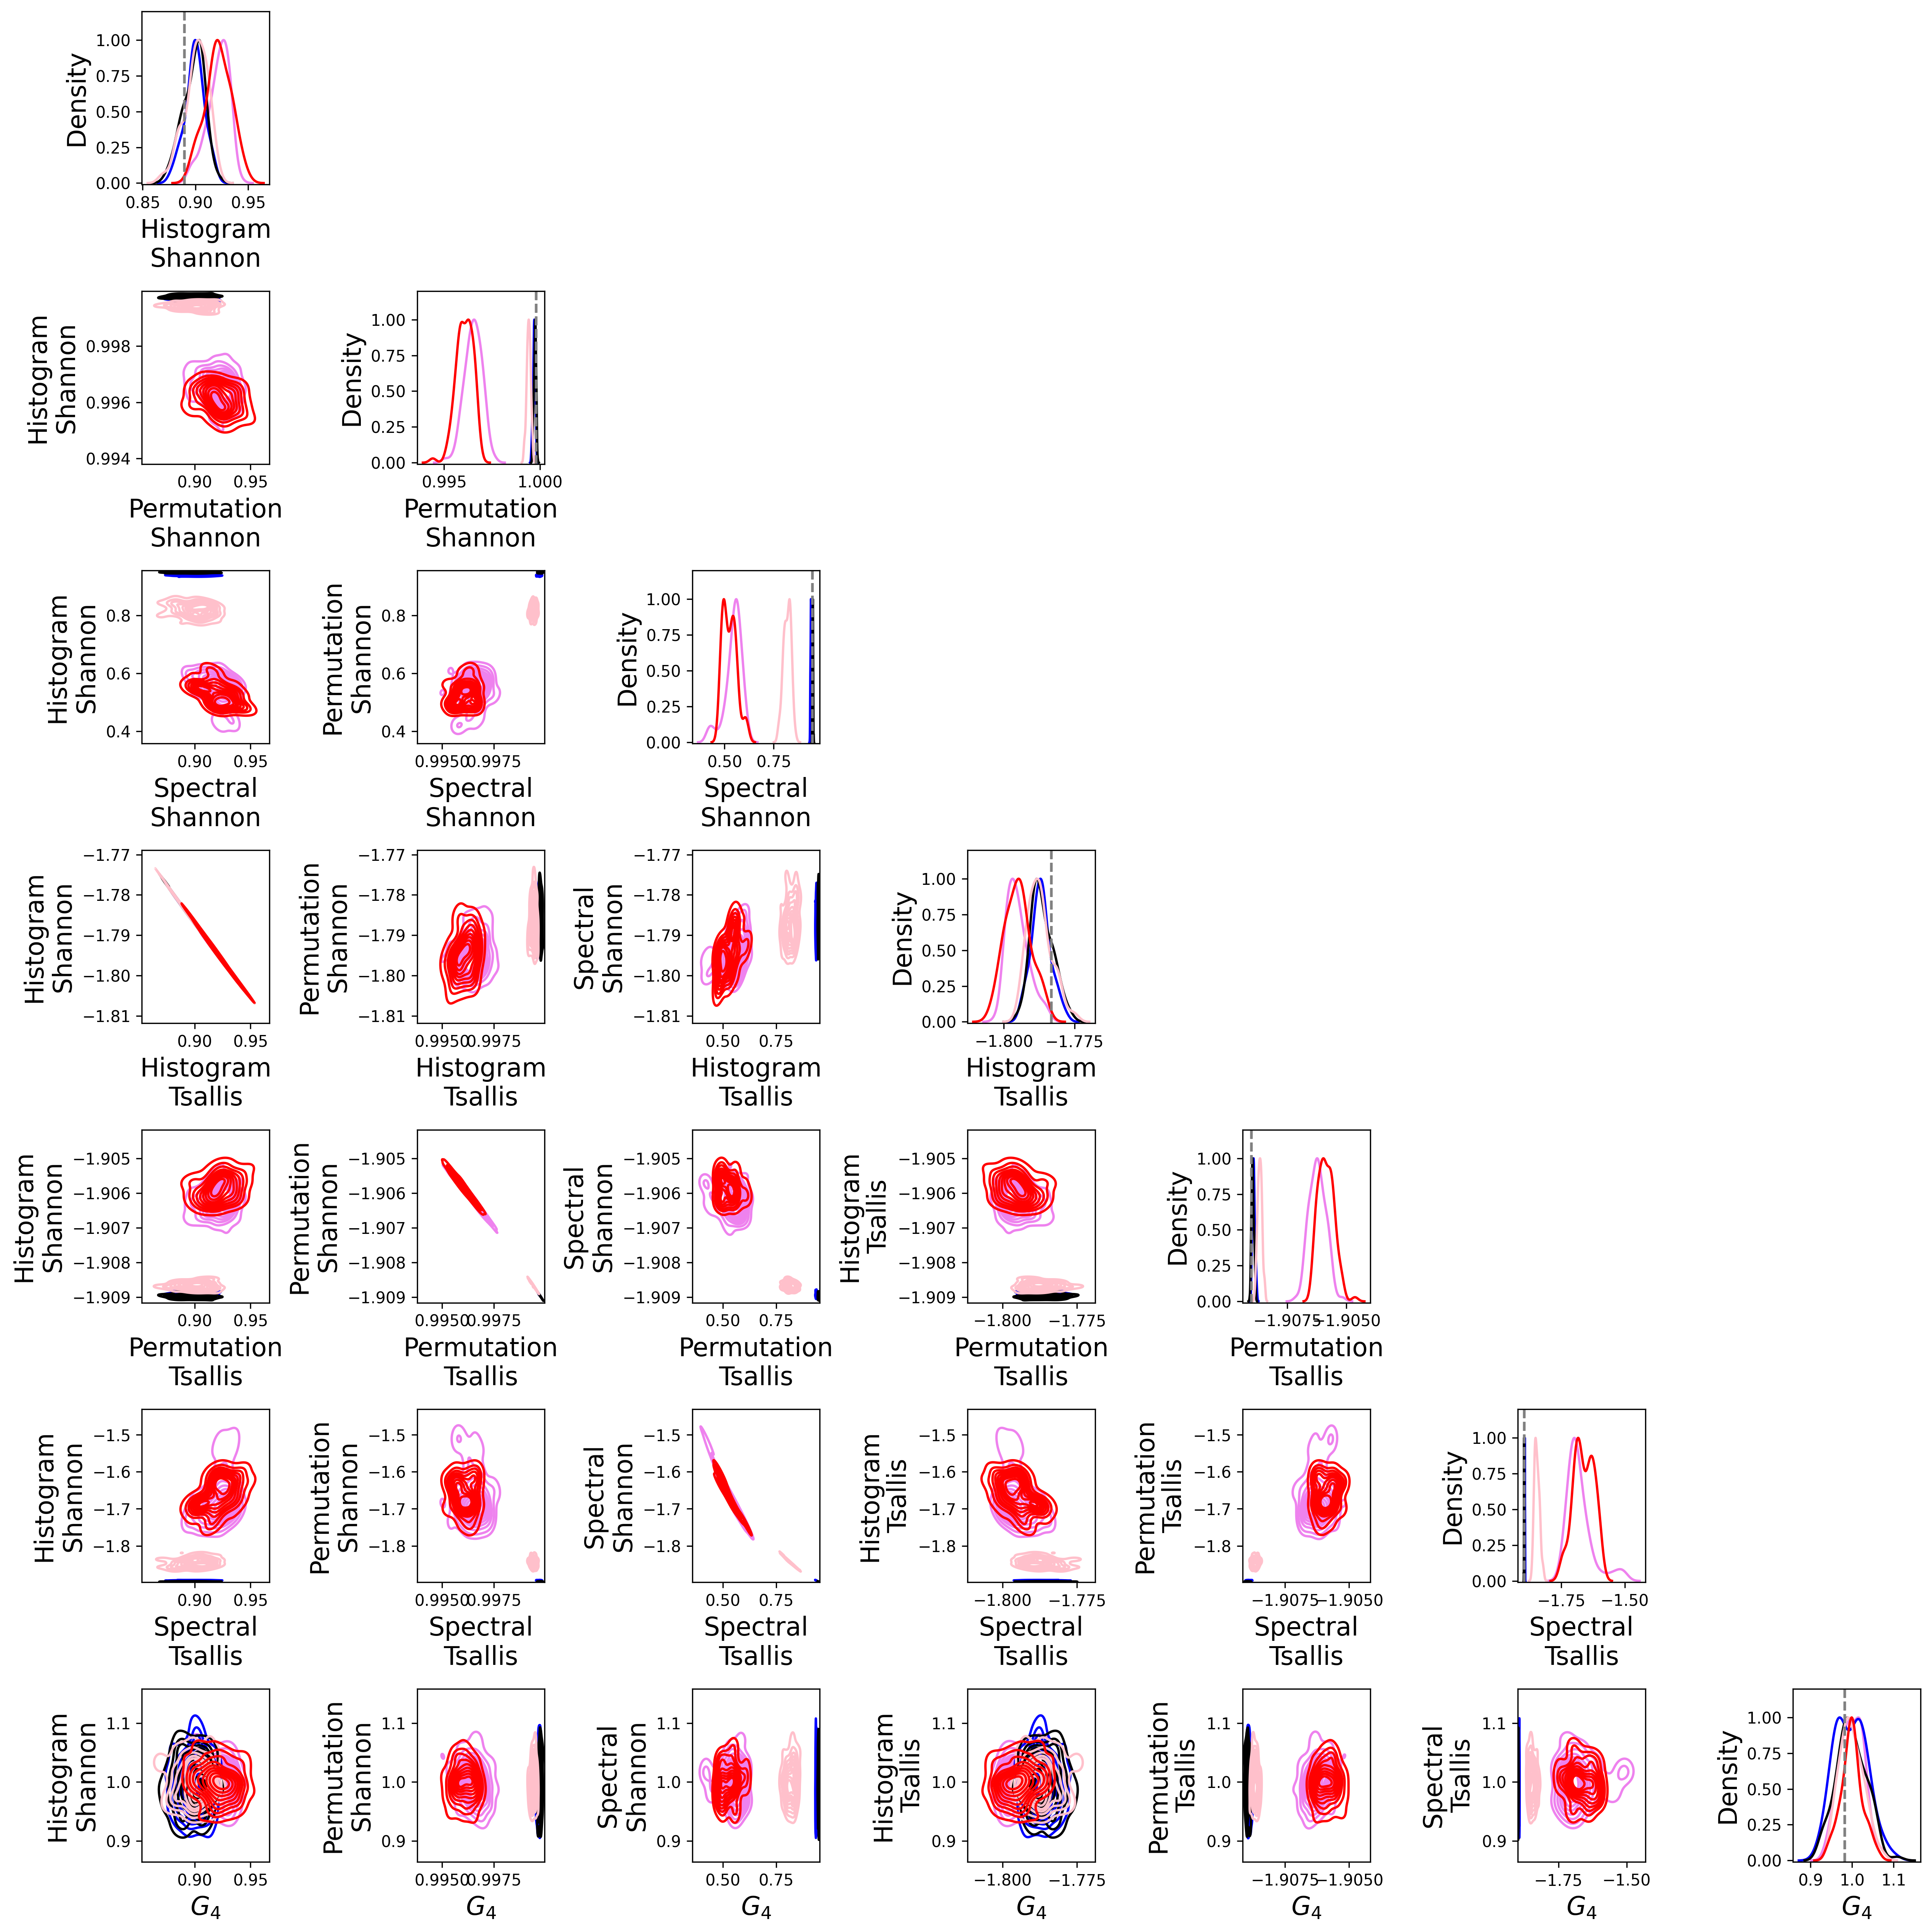

In [64]:
fontsize = 16
names = df_violet.columns.values.copy()
# for i in range(len(names)): names[i]= names[i].replace('_', '\n').replace('Powerlaw','')
gs = GridSpec(len(names),len(names))

plt.figure(figsize=(17,17),dpi=300)
for j in range(len(names)):
  for i in range( j, len(names)):
      plt.subplot(gs[i,j])
      if i==j:
        ax = sns.kdeplot(df_violet[names[i]],color='violet',common_norm=True)
        ax = sns.kdeplot(df_blue[names[i]]  ,color='blue'  ,common_norm=True)
        ax = sns.kdeplot(df_white[names[i]] ,color='black' ,common_norm=True)
        ax = sns.kdeplot(df_pink[names[i]]  ,color='pink'  ,common_norm=True)
        ax = sns.kdeplot(df_red[names[i]]   ,color='red'   ,common_norm=True)
        for line in ax.lines:
          line.set_ydata(normalize(line.get_ydata(),0,1))
          plt.axvline(df_white[names[i]].iloc[0],color='gray',ls='--')
        if names[i] == '$G_4$':
          plt.xlabel(names[i],size=fontsize)

        else:
          plt.xlabel(names[i].replace('_', '\n').replace('Powerlaw',''),size=fontsize)
        plt.ylabel('Density',size=fontsize)
        plt.ylim(-0.01,1.2)
      else:
        sns.kdeplot(df_violet[[names[i],names[j]]],x=names[j],y=names[i],color='violet',fill=False)
        sns.kdeplot(df_blue[[names[i],names[j]]],x=names[j]  ,y=names[i],color='blue'  ,fill=False)
        sns.kdeplot(df_white[[names[i],names[j]]],x=names[j] ,y=names[i],color='black' ,fill=False)
        sns.kdeplot(df_pink[[names[i],names[j]]],x=names[j]  ,y=names[i],color='pink'  ,fill=False)
        sns.kdeplot(df_red[[names[i],names[j]]],x=names[j]   ,y=names[i],color='red'   ,fill=False)
        if names[i] == '$G_4$':
          plt.xlabel(names[i],size=fontsize)
          # plt.ylabel(names[j],size=fontsize)
        else:
          plt.xlabel(names[i].replace('_', '\n').replace('Powerlaw',''),size=fontsize)
        plt.ylabel(names[j].replace('_', '\n').replace('Powerlaw',''),size=fontsize)

# plt.legend(handles=legend_elements,fontsize=14,loc='upper right',bbox_to_anchor=(0.5,1.9))
plt.tight_layout()
plt.savefig('cube_spaces.pdf')
plt.show()